In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  tensorflow import keras
%matplotlib inline

In [26]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCHS = 10
CHANNELS = 3

In [28]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'Training',
    seed=123,
    shuffle=True,
    image_size=(256, 256),
    batch_size=32,
    validation_split=0.2,
    subset='both'
)

Found 27455 files belonging to 24 classes.
Using 21964 files for training.
Using 5491 files for validation.


In [29]:
Training=dataset[0]
validation=dataset[1]

In [30]:
class_name=Training.class_names

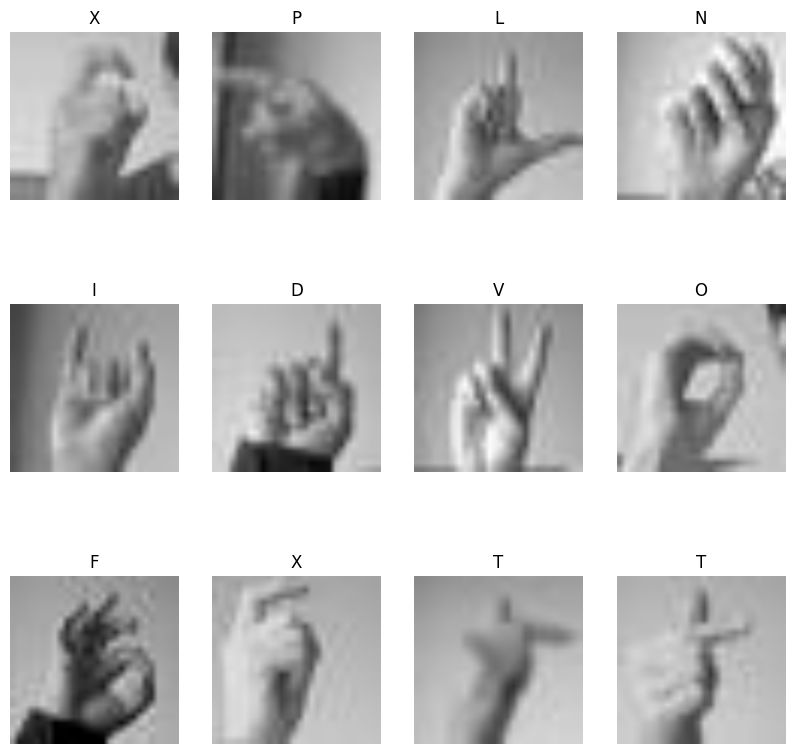

In [36]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in Training.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_name[label_batch[i]])
        plt.axis('off')
    # print(image_batch[0].numpy())
    # print(label_batch)

In [37]:
test_ds=Training.skip(round(len(Training)*0.8))


In [39]:
Training=Training.take(round(len(Training)*0.8))

In [40]:
len(test_ds),len(Training)

(137, 550)

In [ ]:
train_ds=Training.cache().shuffle(1000).prefectch(buffer_size=tf.data.AUTOTUNE)
val_ds=validation.cache().shuffle(1000).prefectch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefectch(buffer_size=tf.data.AUTOTUNE)

In [41]:
resize_rescale=tf.keras.Sequential([
    keras.layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    keras.layers.Rescaling(1./255)
])

In [42]:
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
])

In [47]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
num_classes=len(class_name)

model=keras.models.Sequential([
    resize_rescale,
    data_augmentation,

    keras.layers.Conv2D(32,kernel_size=(3,3),input_shape=input_shape,activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(num_classes,activation='softmax'),

])
model.build(input_shape=input_shape)


In [48]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_2 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 